# Mutuelle inductance : influence d'une épaisseur de conducteur

On s'intéresse à l'influence d'une épaisseur $e$ de conducteur placée entre deux bobinages sur la mutuelle inductance entre ces bobinages. On considère donc le montage suivant. Le bobinage 1 est alimenté par un GBF et le bobinage 2 est à vide.


<div>
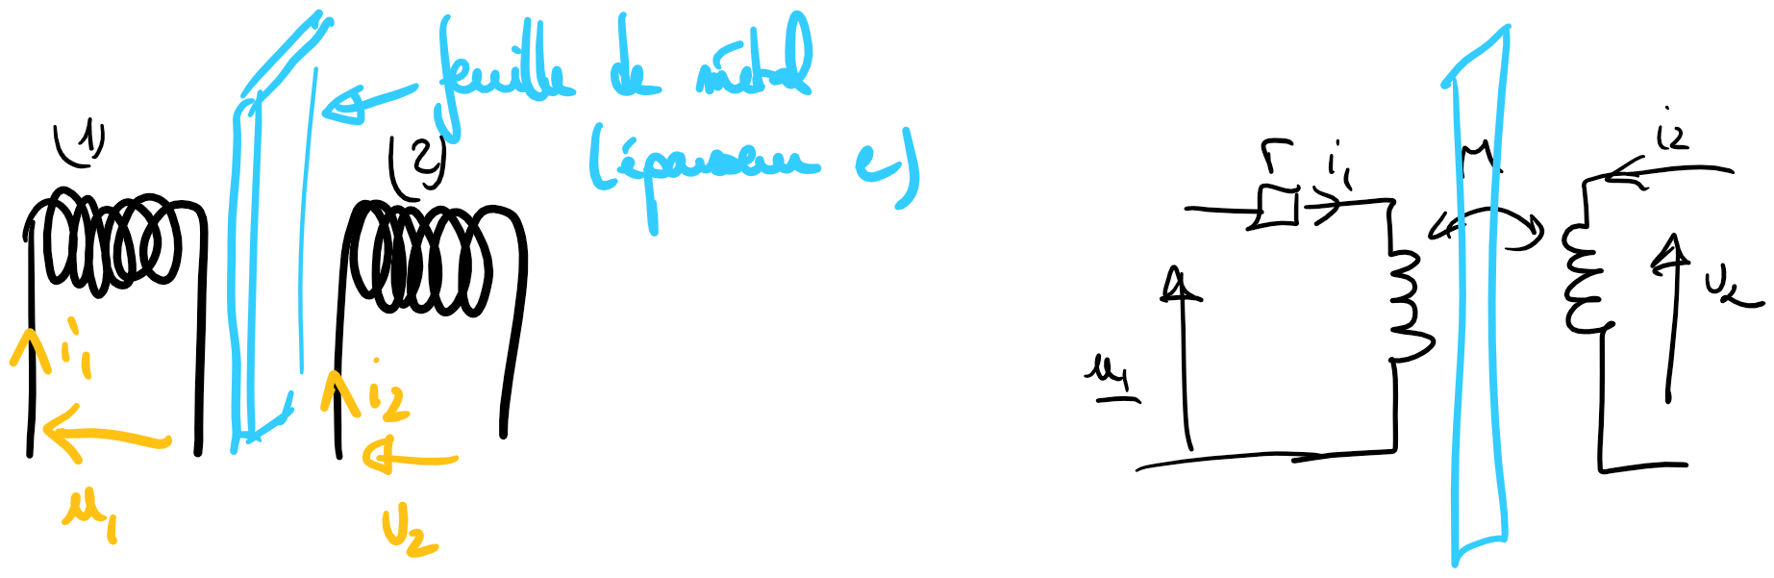
</div>

L'analyse du circuit permet de montrer, dans ces conditions, que :
$$\underline{H}=\frac{\frac{jM\omega}{r}}{1+\frac{jL_1\omega}{r}}$$

Le conducteur métallique étant placé dans un champ magnétique variable $\vec{B}(t)$ entre les deux bobinages, il va être le lieu de courants de Foucault qui vont donner naissance, par loi de Lenz, à un champ magnétique $\vec{B'}(t)$ s'opposant à la variation de $\vec{B}$.

<div>
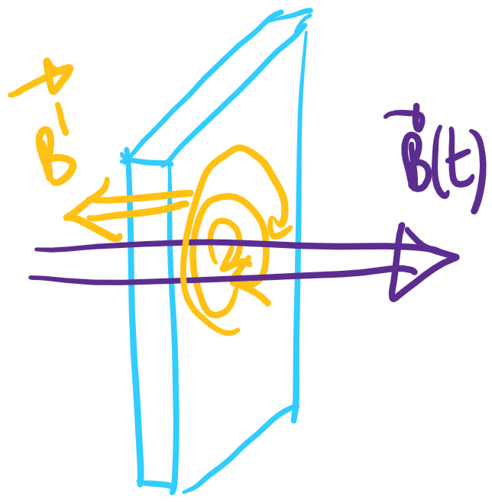
</div>

Déterminons donc $\vec{B'}$. Dans le cadre de notre étude, $i_2=0$ car le bobinage secondaire est à vide. Donc le champ magnétique qui traverse la plaque est celui créé par le bobinage 1. Pour simplifier, on suppose que la plaque de métal est suffisamment proche du bobinage 1 pour que $\vec{B}$ soit uniforme sur un disque de rayon $R$ (rayon du bobinage 1 de surface $S=\pi R^2$).

De plus, le flux propre de $\vec{B}$ à travers le bobinage 1 est 
$$\phi_{01}=L_1 i_1=N_1 B S$$
et donc 
$$B=\frac{L_1}{N_1 S} i_1=\frac{L_1}{N_1 S} I_1 \cos(\omega t)$$

Déterminons désormais le champ électrique $\vec{E}$ qui apparaît dans le conducteur en utilisant l'équation de Maxwell Faraday. On suppose, par une étude de symétries et d'invariances, que $\vec{E}=E(r,t) \vec{u}_\theta$. 
$$\vec{rot}(\vec{E})=-\frac{\partial \vec{B}}{\partial t}$$
Qui, par intégration sur un disque de rayon $r$ et application du théorème de Stokes, donne :
$$\forall r<R : E(r,t) = \omega \frac{L_1}{2 N_1 S} I_1 \sin(\omega t) \times r$$
$$\forall r>R : E(r,t) = \omega \frac{L_1}{2 N_1 S} I_1 \sin(\omega t) \times \frac{R^2}{r}$$
On en déduit alors la densité de courant dans le conducteur par la loi d'Ohm locale : $\vec{j}=\gamma \vec{E}$.

Dans le conducteur, tout se passe donc comme si on avait une superposition de spires circulaires parcourues par des courants $\delta I (r) = j(r,t)\times e\times dr$ :

<div>
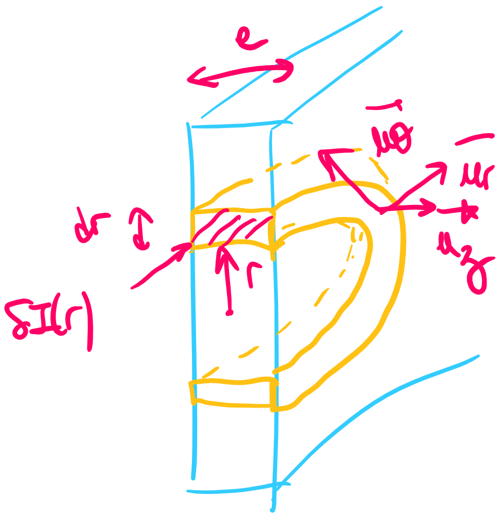
</div>

Or, il est un résultat connu : une spire circulaire de rayon $r$, parcourue par un courant $I$, créée sur son axe un champ magnétique :

<div>
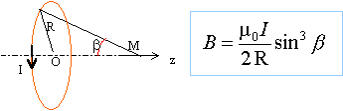
</div>


Donc, ici, le champ magnétique $\vec{B'}$ créé par les courants de Foucault en un point M sur l'axe de symétrie de révolution est :

$$\vec{B'}=\int_0^\infty \frac{\mu_0 \delta I (r)}{2r} \frac{r^3}{(r^2+z^2)^{3/2}}\vec{u}_z$$
$$\vec{B'}=\left(\int_0^R \frac{\mu_0 \omega L_1}{4 N_1 S} I_1 \sin(\omega t) \frac{r^3}{(r^2+z^2)^{3/2}} \gamma edr +\int_R^\infty \frac{\mu_0 \omega L_1}{4 N_1 S} I_1 \sin(\omega t) \frac{r^3}{(r^2+z^2)^{3/2}}\frac{R^2}{r^2} \gamma edr \right)\vec{u}_z $$
Que l'on note, pour simplifier :
$$\vec{B'}=- A \times \frac{di_1}{dt} \vec{u}_z$$

Ce champ est donc le champ induit par les courants de Foucault, en un point $M$ sur l'axe de révolution, à une distance $z$ à droite de la feuille de conducteur. On va faire l'hypothèse (grosse) que c'est le champ qui traverse toute la section du bobinage 2, et qu'il est uniforme. Ainsi le flux de $\vec{B'}$ sur le bobinage 2 est :
$$\phi_{B'->2}=- A \times \frac{di_1}{dt} N_2 S$$
Soit, en notation complexe :
$$\underline{\phi}_{B'->2}=- A j\omega \underline{i_1} N_2 S$$
Le flux total vu par le bobinage 2 est alors :
$$\underline{\phi}_2=\underline{\phi}_{1->2}+\underline{\phi}_{B'->2}=M\underline{i_1}- A j\omega \underline{i_1} N_2 S=(M-jM')\underline{i_1}$$
Il s'agit donc de remplacer $M$ par $M-jM'$. La fonction de transfert devient :
$$\underline{H}=\frac{\frac{j(M-jM')\omega}{r}}{1+\frac{jL_1\omega}{r}}$$
Dans la bande passante du filtre (en HF quand $1<<L\omega/r$), on a :
$$\underline{H}\simeq\frac{j(M-jM')}{L_1}$$
Ainsi, le rapport des amplitudes de $u_2$ sur $u_1$ est égal au module de la fonction de transfert et vaut :
$$\frac{U_2}{U_1}=\frac{\sqrt{M^2+M'^2}}{L_1}>\frac{M}{L_1}$$
Pour voir comment cette grandeur dépend de l'épaisseur de métal, effectuons l'intégration numérique du calcul précédent.


In [13]:
import numpy as np
from math import sqrt

f=1e3
w=2*3.14*f
R=2e-2 #rayon
S=3.14*R**2
mu0=4*3.14e-7
gamma=1e7
z=3e-2
N1=50
N2=50
L1=10e-3


e=np.linspace(100e-6,5e-3,10)

def a_integrer(r,e):
    if r<R :
        return mu0*L1/(4*N1*S)*gamma*e/((sqrt(r**2+z**2))**3)*(r**3)
    else :
        return mu0*L1/(4*N1*S)*gamma*e/((sqrt(r**2+z**2))**3)*r*R
        
tab_r=np.linspace(0,1,1e4)
dr=tab_r[1]-tab_r[0]

def Mprim(e):
    A=0
    for i in range(len(tab_r)):
        A+=a_integrer(tab_r[i],e)*dr
    return -A*w*N2*S  

Mp=[]
for elt in e :
    Mp.append(Mprim(elt))
        
        
        

<input>:24: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [14]:
Mp


[-0.010572028505189419, -0.06813085036677709, -0.1256896722283648, -0.18324849408995117, -0.24080731595153818, -0.298366137813127, -0.35592495967471216, -0.413483781536297, -0.47104260339788706, -0.5286014252594761]